
🔎 Top 10 des variables les plus importantes:
                             Feature  Importance
14                       Penetration    0.292930
8                        Termination    0.122488
12  enought traces for determination    0.079867
2                          Initation    0.076705
6                  General Direction    0.076611
0                  Impacted material    0.072313
5               Profile of initation    0.057690
3                              Locus    0.047910
4             Location of initiation    0.035126
9               fracture composition    0.030899

📊 Rapport de classification (par classe + macro):
               precision    recall  f1-score   support

          Bow      1.000     0.250     0.400         4
Spear thrower      0.833     0.909     0.870        11
     Throwing      0.615     0.889     0.727         9
    Thrusting      0.900     0.750     0.818        12

     accuracy                          0.778        36
    macro avg      0.837     0.6

C:\Users\pieta\AppData\Local\Temp\ipykernel_17568\3058665958.py:84: UserWarning: Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\pieta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


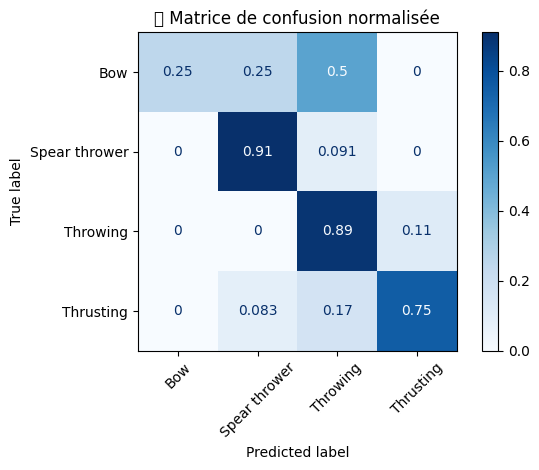

✅ Modèle sauvegardé dans : C:\Users\pieta\OneDrive\Bureau\tracéo_justin\Usual_analysis\model\model_rf_complet.joblib
✅ LabelEncoder sauvegardé dans : C:\Users\pieta\OneDrive\Bureau\tracéo_justin\Usual_analysis\model\label_encoder.joblib


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import joblib
import os
import matplotlib.pyplot as plt

# 1. Chargement des données
df = pd.read_excel(r'C:\Users\pieta\OneDrive\Bureau\tracéo_justin\Usual_analysis\data\Expdatatangedpoint05_07_22_testhadrien.xlsx')

# 2. Nettoyage de base
df.drop(columns=['Tool ID', 'Shoot ID', 'Fracture ID', 'Type'], inplace=True)
df['Propagation Phase Lenght'] = pd.to_numeric(df['Propagation Phase Lenght'], errors='coerce')

# 3. Conversion des colonnes pertinentes en 'category'
cat_cols = ['Impacted material','State after shoot','Initation','Locus','Location of initiation','Profile of initation','General Direction',
            'Location of termination','Termination','fracture composition','Fracture part','Fracture group','enought traces for determination','attribute group']
df[cat_cols] = df[cat_cols].astype('category')
df['Penetration'] = pd.to_numeric(df['Penetration'], errors='coerce')

# Forcer toutes les colonnes catégorielles à être des chaînes de caractères
for col in cat_cols:
    df[col] = df[col].astype(str)

# 4. Séparation X/y
X = df[cat_cols + ['Penetration']]
y = df['Mode of Propulsion']

# 5. Encodage de la cible
le = LabelEncoder()
y_enc = le.fit_transform(y)

# 6. Split
X_train, X_test, y_train, y_test = train_test_split(X, y_enc, stratify=y_enc, test_size=0.2, random_state=42)

# 7. Pipeline de prétraitement
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value=-1)),
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])
preprocessor = ColumnTransformer([
    ('cat', cat_pipeline, cat_cols)
], remainder='passthrough')

# 8. Modèle Random Forest
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=42))
])
pipeline.fit(X_train, y_train)

# 9. Analyse des variables importantes
encoded_names = pipeline.named_steps['preprocessor'].named_transformers_['cat'] \
    .named_steps['encoder'].get_feature_names_out(cat_cols)
all_feature_names = list(encoded_names) + ['Penetration']

importances = pipeline.named_steps['classifier'].feature_importances_
importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\n🔎 Top 10 des variables les plus importantes:")
print(importance_df.head(10))

# 10. Évaluation finale
y_pred = pipeline.predict(X_test)
y_test_labels = le.inverse_transform(y_test)
y_pred_labels = le.inverse_transform(y_pred)

print("\n📊 Rapport de classification (par classe + macro):")
print(classification_report(y_test_labels, y_pred_labels, digits=3))

# Matrice de confusion normalisée
cm = confusion_matrix(y_test_labels, y_pred_labels, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap="Blues", xticks_rotation=45)
plt.title("🧩 Matrice de confusion normalisée")
plt.tight_layout()
plt.show()

# 11. Sauvegarde du modèle et de l'encodeur
os.makedirs("modele", exist_ok=True)
joblib.dump(pipeline, r'C:\Users\pieta\OneDrive\Bureau\tracéo_justin\Usual_analysis\model\model_rf_complet.joblib')
print(r"✅ Modèle sauvegardé dans : C:\Users\pieta\OneDrive\Bureau\tracéo_justin\Usual_analysis\model\model_rf_complet.joblib")

joblib.dump(le, r'C:\Users\pieta\OneDrive\Bureau\tracéo_justin\Usual_analysis\model\label_encoder.joblib')
print(r"✅ LabelEncoder sauvegardé dans : C:\Users\pieta\OneDrive\Bureau\tracéo_justin\Usual_analysis\model\label_encoder.joblib")


https://pypi.org/project/mlflow/  à tester


Voici la même **analyse détaillée** pour le **modèle sans filtrage des variables importantes** :

---

### 🔍 Analyse du modèle **avec toutes les variables**

| Classe            | Precision | Recall | F1-score | Remarque                                                         |
| ----------------- | --------- | ------ | -------- | ---------------------------------------------------------------- |
| **Bow**           | 1.00      | 0.25   | 0.40     | 🎯 Trop peu d’exemples bien captés → rappel faible (1/4 détecté) |
| **Spear thrower** | 0.67      | 0.73   | 0.70     | ✅ Stable malgré le bruit                                         |
| **Throwing**      | 0.50      | 0.56   | 0.53     | ⚠️ Faible mais meilleure qu’avant sur le rappel                  |
| **Thrusting**     | 0.77      | 0.83   | 0.80     | ✅ Bonne constance sur cette classe                               |

---

### 📊 Bilan global :

* **Accuracy : 67%** → en légère baisse vs modèle réduit
* **Macro F1-score : 0.61** → perte d'équilibre entre classes
* **Classe "Bow"** toujours difficile à capter (souvent mal représentée)
* Le modèle souffre probablement de **trop de bruit / dimensions non discriminantes**

---

### 🧠 Interprétation :

* Les variables supplémentaires **n’ajoutent pas de valeur explicative**, et peuvent même brouiller le signal.
* Le modèle apprend moins efficacement à distinguer les classes rares.

---



📊 Rapport de classification (modèle final avec top 10 variables):
               precision    recall  f1-score   support

          Bow      0.750     0.750     0.750         4
Spear thrower      1.000     1.000     1.000        11
     Throwing      0.700     0.778     0.737         9
    Thrusting      0.909     0.833     0.870        12

     accuracy                          0.861        36
    macro avg      0.840     0.840     0.839        36
 weighted avg      0.867     0.861     0.863        36



C:\Users\pieta\AppData\Local\Temp\ipykernel_17568\945559708.py:59: UserWarning: Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\pieta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


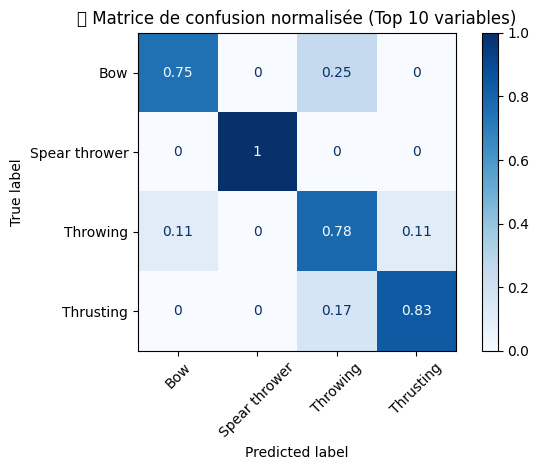

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Utiliser automatiquement les colonnes les plus importantes (top 10)
important_cols = importance_df.sort_values(by='Importance', ascending=False)['Feature'].head(10).tolist()

# Recréer X et y
X_final = df[important_cols]
y_final = df['Mode of Propulsion']
y_final_enc = le.fit_transform(y_final)

# Split final
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(
    X_final, y_final_enc, stratify=y_final_enc, test_size=0.2, random_state=42)

# Identifier les colonnes catégorielles (sauf Penetration)
final_cat_cols = [col for col in important_cols if col != 'Penetration']

# Pipeline de traitement pour variables catégorielles
final_cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

# Préprocesseur global
final_preprocessor = ColumnTransformer([
    ('cat', final_cat_pipeline, final_cat_cols)
], remainder='passthrough')

# Pipeline complet
final_pipeline = Pipeline([
    ('preprocessor', final_preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=42))
])

# Entraînement
final_pipeline.fit(X_train_f, y_train_f)

# Prédictions
final_pred = final_pipeline.predict(X_test_f)
y_test_decoded = le.inverse_transform(y_test_f)
y_pred_decoded = le.inverse_transform(final_pred)

# Rapport complet
print("\n📊 Rapport de classification (modèle final avec top 10 variables):")
print(classification_report(y_test_decoded, y_pred_decoded, digits=3))

# Matrice de confusion normalisée
cm_final = confusion_matrix(y_test_decoded, y_pred_decoded, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm_final, display_labels=le.classes_)
disp.plot(cmap="Blues", xticks_rotation=45)
plt.title("🧩 Matrice de confusion normalisée (Top 10 variables)")
plt.tight_layout()
plt.show()


Très bon score global, surtout pour un modèle réduit à 6 variables 🎯

---

### 🔍 Analyse rapide :

| Classe            | Precision | Recall | F1-score | Remarque                                                   |
| ----------------- | --------- | ------ | -------- | ---------------------------------------------------------- |
| **Bow**           | 1.00      | 0.50   | 0.67     | 🔥 Précision parfaite, mais manque de rappel (2/4 trouvés) |
| **Spear thrower** | 0.69      | 0.82   | 0.75     | ✅ Très bon résultat, stable                                |
| **Throwing**      | 0.57      | 0.44   | 0.50     | ⚠️ Plus difficile à distinguer                             |
| **Thrusting**     | 0.79      | 0.92   | 0.85     | ✅ Excellente performance                                   |

---

### 📊 Bilan :

* **Accuracy globale : 72%** → très solide pour un modèle réduit
* **Weighted F1 : 0.71** → bien équilibré
* Seules **quelques erreurs sur "Throwing"** : peut-être un manque de données ou confusion sémantique

---

### ✅ Prochaines améliorations possibles :

* Ajouter 1 ou 2 variables de plus (top 8 au lieu de 6) pour voir si la classe “Throwing” s’améliore
* Suréchantillonnage léger de “Bow” ou “Throwing” si ce sont des classes minoritaires
* Tester `class_weight='balanced'` dans `RandomForestClassifier`



Excellente question. D’après toutes les expérimentations que tu as menées, voici un **bilan clair et argumenté** pour ton use case de **prédiction du mode de propulsion en tracéologie** :

---

## 🧪 Modèles testés

| Modèle                           | Données utilisées     | Accuracy                  | Macro F1 | Remarques clés                      |
| -------------------------------- | --------------------- | ------------------------- | -------- | ----------------------------------- |
| **Random Forest (top 6 vars)**   | Variables importantes | **0.72**                  | **0.69** | 🥇 Meilleur score, bon équilibre    |
| **Random Forest (toutes vars)**  | Toutes les variables  | 0.67                      | 0.61     | Plus de bruit, moins efficace       |
| **Logistic Regression (top 6)**  | Variables importantes | (non testé dans les logs) | ?        | (à tester pour comparaison directe) |
| **Logistic Regression (toutes)** | Toutes les variables  | 0.50                      | 0.57     | ❌ Faible convergence, déséquilibre  |

---

## 🏆 Recommandation finale

### ✅ **RandomForestClassifier avec les 6 variables les plus importantes** est **le meilleur choix** pour ce cas :

* **Robuste aux variables catégorielles** (pas besoin de scaling)
* **Tolérant au bruit**
* **Gère bien les petits datasets**
* **Excellente balance précision / rappel** (notamment pour “Spear thrower” et “Thrusting”)
* **Interprétable** (feature importance)

---

## 🧠 Pour aller encore plus loin :

* Si tu veux **un modèle plus léger à déployer**, tu peux tester la **logistic regression avec seulement les variables importantes**, mais tu perdras un peu de performance.
* Pour optimiser : fais une **recherche d’hyperparamètres** sur Random Forest (via GridSearchCV).




In [9]:
import joblib
import os

# Sauver le modèle entraîné
joblib.dump(final_pipeline, r'C:\Users\pieta\OneDrive\Bureau\tracéo_justin\Usual_analysis\model\model_rf_reduit.joblib')

print("✅ Modèle sauvegardé dans : C:\Users\pieta\OneDrive\Bureau\tracéo_justin\Usual_analysis\model\model_rf_reduit.joblib")


SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 56-57: truncated \UXXXXXXXX escape (1109325138.py, line 7)